# Examples
##### Some usage examples and ways to make the figure better than what default options yield.

#### A very simple example from http://stackoverflow.com/q/19073683/1304161, but we'll make quite a nice figure in the end.

First import stuff

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from adjustText import adjust_text
import numpy as np
import pandas as pd

First let's just create the data and plot it with no adjustment or anything.

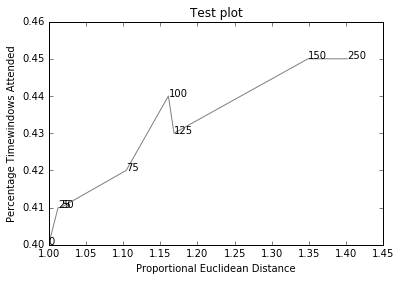

In [2]:
together = [(0, 1.0, 0.4), (25, 1.0127692669427917, 0.41), (50, 1.016404709797609, 0.41), (75, 1.1043426359673716, 0.42), (100, 1.1610446924342996, 0.44), (125, 1.1685687930691457, 0.43), (150, 1.3486407784550272, 0.45), (250, 1.4013999168008104, 0.45)]
together.sort()

text = [x for (x,y,z) in together]
eucs = [y for (x,y,z) in together]
covers = [z for (x,y,z) in together]
def plot_eucs_covers():
    plt.plot(eucs,covers,color="black", alpha=0.5)
    texts = []
    for xt, yt, s in zip(eucs, covers, text):
        texts.append(plt.text(xt, yt, s))

    plt.xlabel("Proportional Euclidean Distance")
    plt.ylabel("Percentage Timewindows Attended")
    plt.title("Test plot")
    return texts
plot_eucs_covers()
plt.show()

Now let's just apply the text adjustment with all default parameters and define the arrow properties we like.

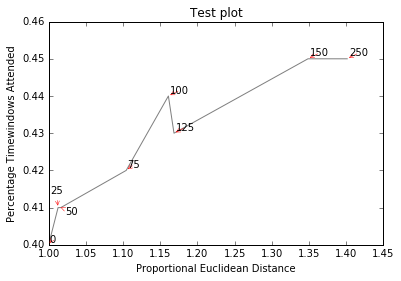

In [3]:
texts = plot_eucs_covers()
adjust_text(eucs, covers, texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.show()

Now a couple of labels overlay the line, that's not pretty. We'll create some virtual points along the lines using linear interpolation to repel the labels from the graph itself.

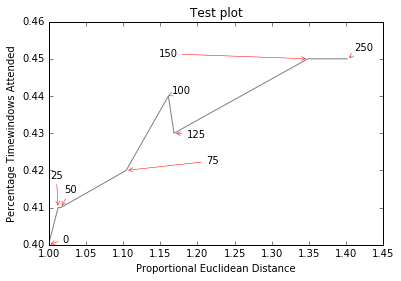

In [4]:
from scipy import interpolate
texts = plot_eucs_covers()
f = interpolate.interp1d(eucs, covers)
x = np.linspace(min(eucs), max(eucs), 1000)
y = f(x)
adjust_text(x, y, texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.show()

Now that's also not very good, we don't really want the labels to move away from the points along the x-axis so far. Let's prevent any movement along the x axis completely!

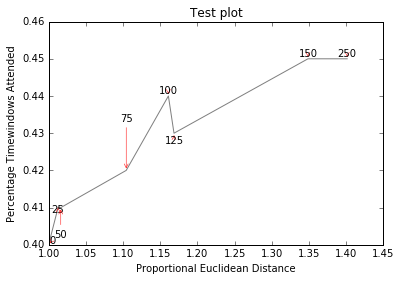

In [5]:
texts = plot_eucs_covers()
adjust_text(x, y, texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
            autoalign='y', only_move={'points':'y', 'text':'y'})
plt.show()

That's kind of OK, but let's play around with the parameters. We want the labels to end up a little further away from the lines, but at the same time not fly so far. For that we need to expand text bounding box when repelling from points a little more (and in our case we need to make it higher), but reduce the force of repelling from points.

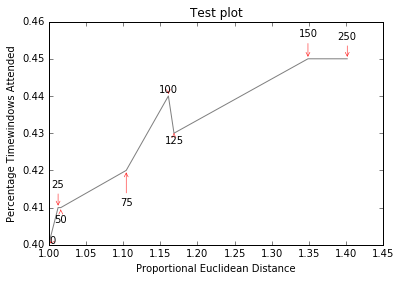

In [6]:
texts = plot_eucs_covers()
adjust_text(x, y, texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
            autoalign='y', only_move={'points':'y', 'text':'y'}, expand_points=(1.2, 1.4), force_points=0.25)
plt.show()

Now this is essentially perfect! Dealing with unequal distance of labels to the line is difficult because of the artificial way we are repelling them and different shape of the line close to different labels.

###### Now a real-world example of a volcano plot
(idea and data from http://www.gettinggeneticsdone.com/2016/01/repel-overlapping-text-labels-in-ggplot2.html)

First let's just plot the data 

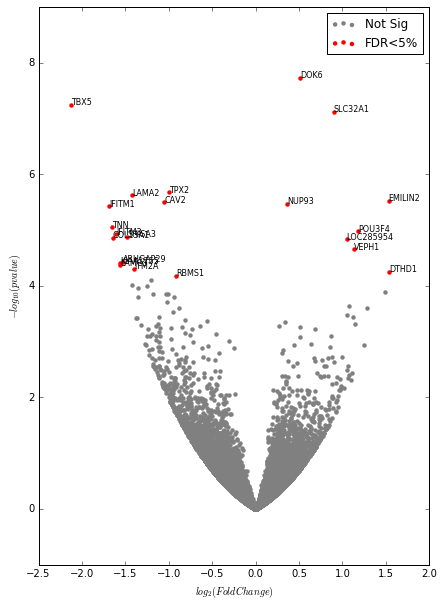

In [7]:
data = pd.read_csv('volcano_data.csv')
def plot_volcano():
    plt.figure(figsize=(7, 10))
    threshold = 0.05
    xns, yns = data['log2FoldChange'][data['padj']>=threshold], -np.log10(data['pvalue'][data['padj']>=threshold])
    plt.scatter(xns, yns, c='grey', edgecolor=(1,1,1,0), label='Not Sig')
    xs, ys = data['log2FoldChange'][data['padj']<threshold], -np.log10(data['pvalue'][data['padj']<threshold])
    plt.scatter(xs, ys, c='r', edgecolor=(1,1,1,0), label='FDR<5%')
    texts = []
    for x, y, l in zip(xs, ys, data['Gene'][data['padj']<threshold]):
        texts.append(plt.text(x, y, l, size=8))
    plt.legend()
    plt.xlabel('$log_2(Fold Change)$')
    plt.ylabel('$-log_{10}(pvalue)$')
    return texts
plot_volcano()
plt.show()

We can't read half of the labels in the left half! Let's adjust them :)

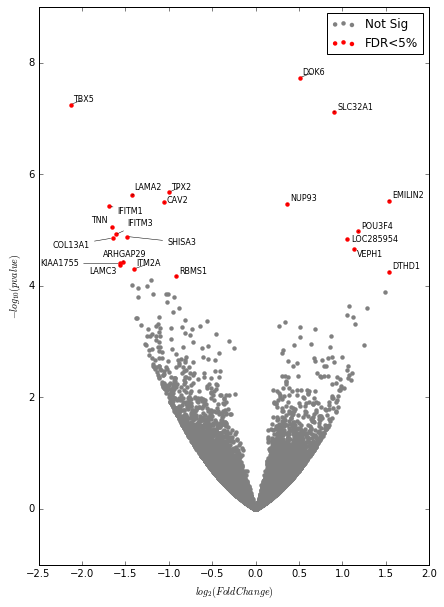

In [8]:
texts = plot_volcano()
adjust_text(data['log2FoldChange'], -np.log10(data['pvalue']), texts,
            arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
plt.show()

What else could you want from this? It's great! And we got that by just adding one line of code.

#### Now a classical mtcars dataset; example from ggrepel package for R

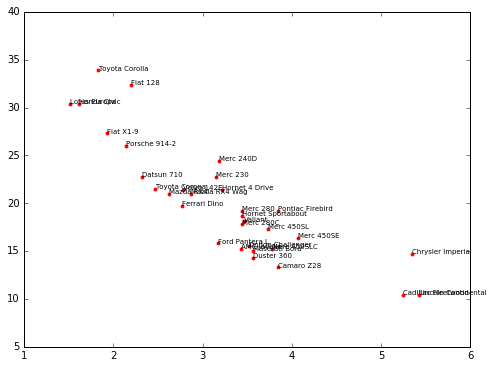

In [9]:
mtcars = pd.read_csv('mtcars.csv')
def plot_mtcars():
    plt.figure(figsize=(8, 6))
    plt.scatter(mtcars['wt'], mtcars['mpg'], s=15, c='r', edgecolors=(1,1,1,0))
    texts = []
    for x, y, s in zip(mtcars['wt'], mtcars['mpg'], mtcars['Car']):
        texts.append(plt.text(x, y, s, size=7))
    return texts
plot_mtcars()
plt.show()

Aaa everything is overlapping!!! Crazy. Let's fix it.

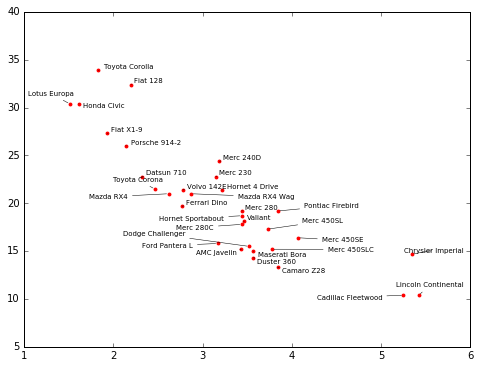

In [10]:
texts = plot_mtcars()
adjust_text(mtcars['wt'], mtcars['mpg'], texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
plt.show()

Well... It's OK, but default settings clearly don't work that well here, it looks a little messy and some labels are unnecessarily far away. What usually helps in this case is reducing the repelling force - the labels then move slower and get a chance to adjust better. Let's try with force of repelling from points. At the same time it's better to expand the texts a little more, but they are already really long. So let's only expand them vertically a little bit more (default is to expand 1.2 times both ways).

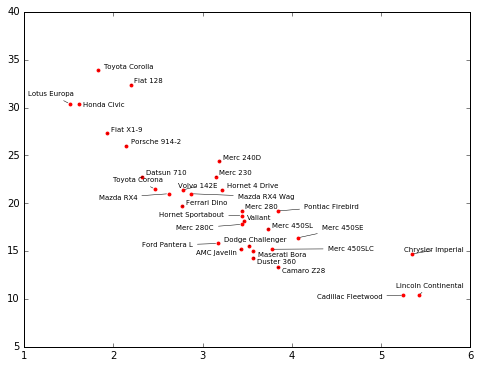

In [11]:
texts = plot_mtcars()
adjust_text(mtcars['wt'], mtcars['mpg'], texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
           force_points=0.9, expand_points=(1.2, 1.3))
plt.show()

Now this is pretty good for such a difficult case!

Note that I specified the figure size for two latter examples. Obviously, making it larger is one of the easiest ways to reduce overlaps, but often it is limited - that's when this library can help!

#### Now an example from https://blog.mafr.de/2012/03/11/time-series-data-with-matplotlib/ with adding labels

In [12]:
import matplotlib.dates as mdates
import locale
locale.setlocale(locale.LC_ALL,'en_GB.utf8') #I have it set to Russian, without this dates don't work

'en_GB.utf8'

In [13]:
days, impressions = np.loadtxt("page-impressions.csv", unpack=True,
        converters={ 0: mdates.strpdate2num('%Y-%m-%d')})

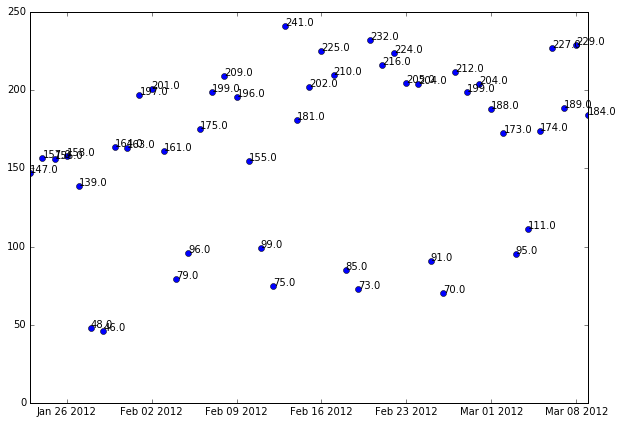

In [14]:
def plot_dates(adjust=False):
    plt.figure(figsize=(10, 7))
    plt.plot_date(x=days, y=impressions)
    texts = []
    for x, y in zip(days, impressions):
        texts.append(plt.text(x, y, y))
    if adjust:
        adjust_text(days, impressions, texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
    plt.show()
plot_dates(adjust=False)

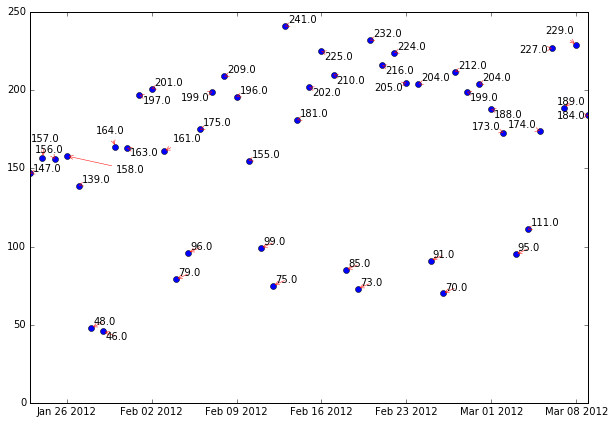

In [15]:
plot_dates(adjust=True) #As a bonus forces labels inside the axes

Practically perfect!